# Clase 03 - Herramientas adicionales

Profesor: **Fernando Becerra**, f.becerra@udd.cl, www.fernandobecerra.com

En esta clase veremos algunas herramientas adicionales que nos ayudarán con la apariencia de nuestros gráficos y nos permitirán agregar elementos como líneas y anotaciones para mejorar la interpretación de nuestras visualizaciones. Comenzaremos importando algunos paquetes de Python.

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Como modelo usaremos los valores `x` e `y` que usamos en el primer ejercicio de la primera clase.


In [3]:
x = np.linspace(-5, 5, num=50)
y = np.cos(x)

Y la misma figura

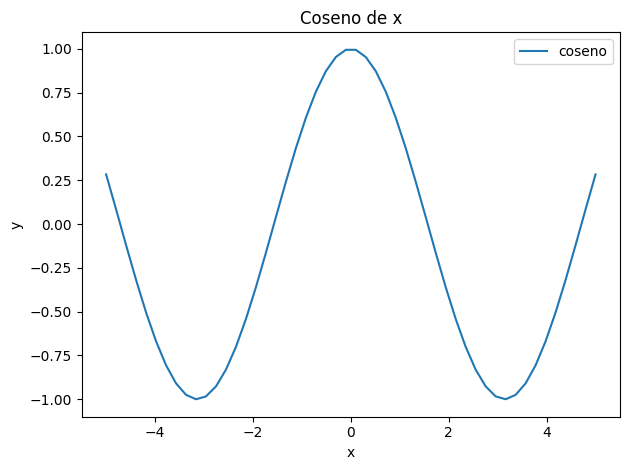

In [4]:
fig, ax = plt.subplots()

ax.plot(x, y, "-", label="coseno")
ax.set_title("Coseno de x")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

fig.tight_layout()

## Borrar ejes

Por defecto matplotlib usa una caja alrededor de nuestro gráfico. En la mayoría de los casos esa caja no es necesaria y distrae de lo que se está graficando dentro de ella, es por eso que es útil saber cómo deshacerse de ella. La primera forma implica borrar todo el axis.

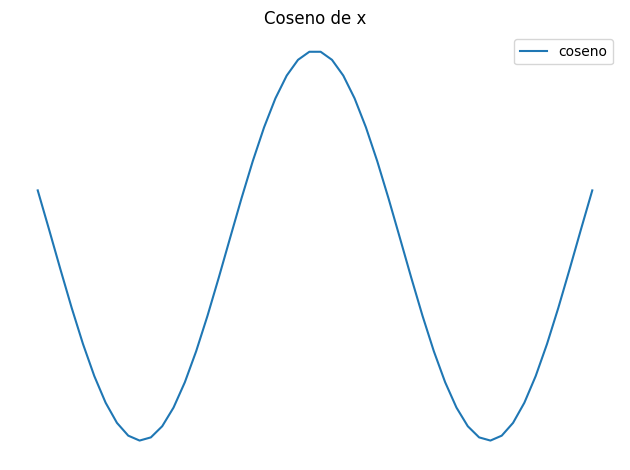

In [5]:
fig, ax = plt.subplots()

ax.plot(x, y, "-", label="coseno")
ax.set_title("Coseno de x")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

ax.set_axis_off()

fig.tight_layout()

La segunda implica solo borrar las líneas, manteniendo los ticks (aunque éstos se pueden borrar independientemente también).


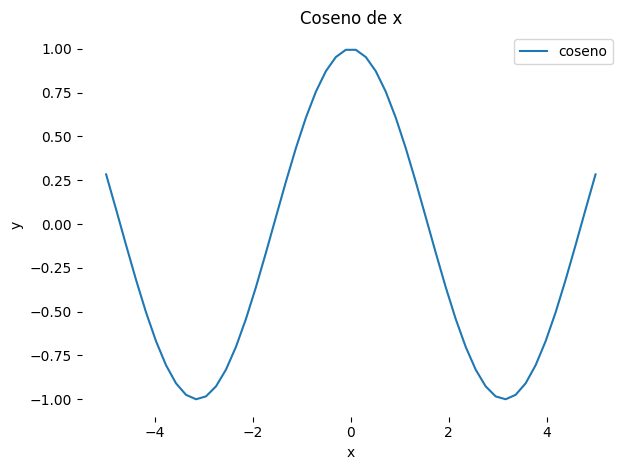

In [6]:
fig, ax = plt.subplots()

ax.plot(x, y, "-", label="coseno")
ax.set_title("Coseno de x")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.tight_layout()

## Anotaciones

Para las anotaciones usaremos la forma más sencilla de hacerlo: usando texto, a través del comando `ax.text`.

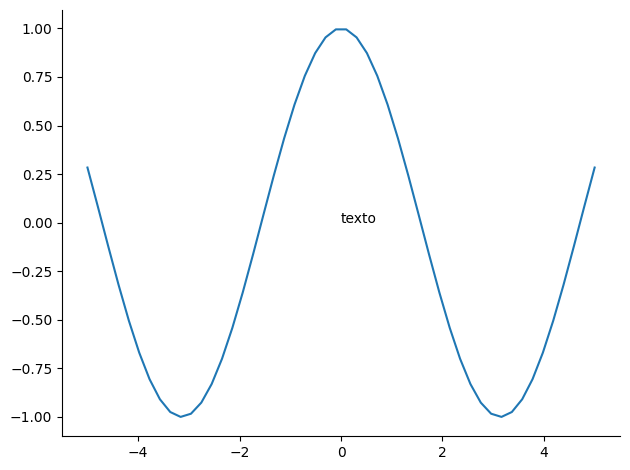

In [7]:
fig, ax = plt.subplots()

ax.plot(x, y, "-", label="coseno")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.text(0,0, 'texto')

fig.tight_layout()

Habitualmente para identificar qué línea corresponde a qué dato se ocupa la leyenda (`ax.legend`), pero esta forma tiene algunas limitaciones. Por ejemplo, a veces hay que mover la vista entre el gráfico y la leyenda varias veces para identificar bien las líneas o en caso de que se olvide a qué dato corresponde. En general es mucho mejor añadir un texto **cercano a la linea** con el nombre de los datos y preferentemente del mismo color que la línea, para que así la identificación sea mas rápida y fácil.


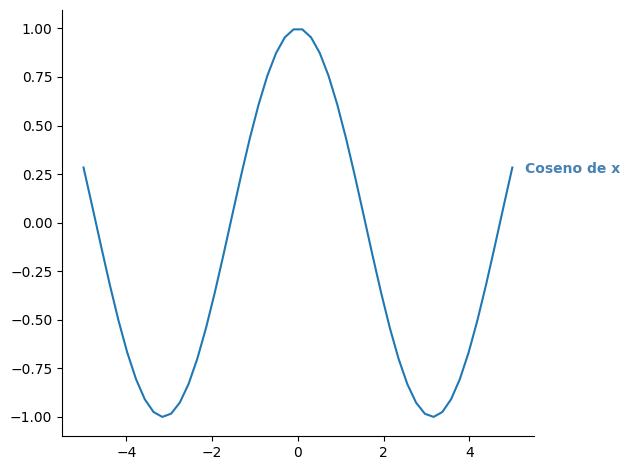

In [8]:
fig, ax = plt.subplots()

ax.plot(x, y, "-", label="coseno")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.text(x[-1] + 0.3, y[-1] - 0.03, 'Coseno de x', color='steelblue', fontweight=600)

fig.tight_layout()

## Título y subtítulo

`ax.text` tiene la ventaja que además puede ser usado para el título y el subtítulo del gráfico

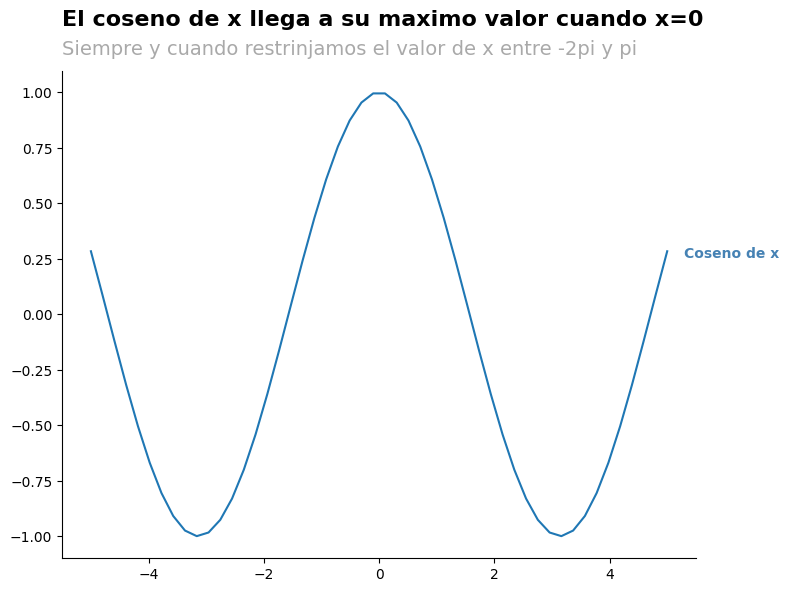

In [9]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, "-", label="coseno")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.text(x[-1] + 0.3, y[-1] - 0.03, 'Coseno de x', color='steelblue', fontweight=600)

ax.text(-5.5, 1.3, "El coseno de x llega a su maximo valor cuando x=0", fontsize=16, fontweight=600, ha='left')
ax.text(-5.5, 1.17, "Siempre y cuando restrinjamos el valor de x entre -2pi y pi", fontsize=14, ha='left', color='darkgray')

fig.tight_layout()

###### 

## Resaltar áreas del gráfico 

### Usando un rectángulo

La primera forma de resaltar áreas de un gráfico es usando un rectángulo. La idea es que sea lo suficientemente sutil para que no interfiera con los datos que se están mostrando.

In [10]:
from matplotlib.patches import Rectangle

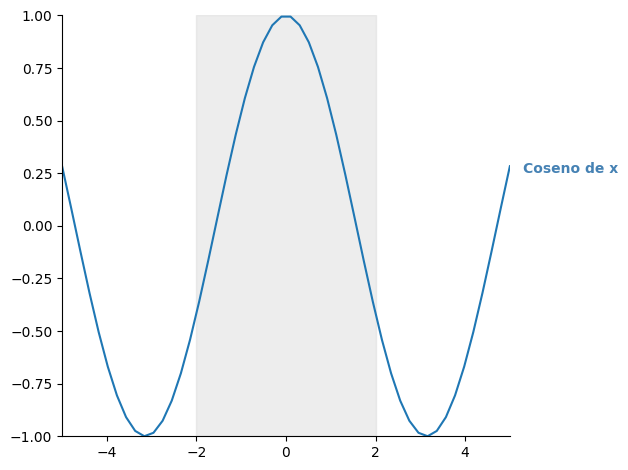

In [11]:
fig, ax = plt.subplots()

ax.plot(x, y, "-", label="coseno")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

rect = Rectangle((-2,-1), 4, 2, color='lightgray', alpha=0.4)
ax.add_patch(rect)

ax.text(x[-1] + 0.3, y[-1] - 0.03, 'Coseno de x', color='steelblue', fontweight=600)

ax.set_xlim(-5, 5)
ax.set_ylim(-1, 1)

fig.tight_layout()

Para complementar también se puede añadir un texto que indique a qué corresponde el área que se está resaltando.

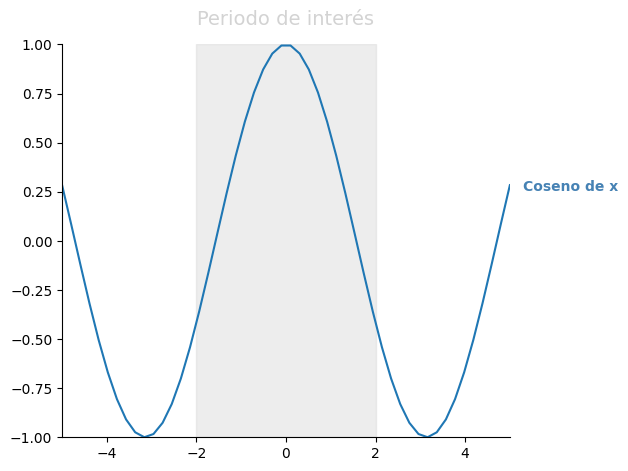

In [12]:
fig, ax = plt.subplots()

ax.plot(x, y, "-", label="coseno")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

rect = Rectangle((-2,-1), 4, 2, color='lightgray', alpha=0.4)
ax.add_patch(rect)
ax.text(0, 1.1, 'Periodo de interés', color='lightgray', ha='center', fontsize=14)

ax.text(x[-1] + 0.3, y[-1] - 0.03, 'Coseno de x', color='steelblue', fontweight=600)

ax.set_xlim(-5, 5)
ax.set_ylim(-1, 1)

fig.tight_layout()

### Fill between

Otra forma es usando el comando `ax.fill_between` que rellena el espacio entre dos funciones o valores del eje y. Esto es útil cuando se quieren mostrar errores de una medición, como por ejemplo la desviación estándar de un cálculo.

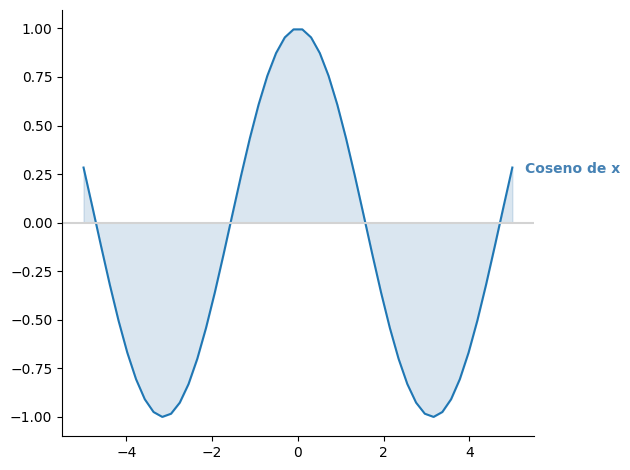

In [13]:
fig, ax = plt.subplots()

ax.plot(x, y, "-", label="coseno")
ax.axhline(0, color='lightgray')
ax.fill_between(x, y, y2=0, color='steelblue', alpha=0.2)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.text(x[-1] + 0.3, y[-1] - 0.03, 'Coseno de x', color='steelblue', fontweight=600)

fig.tight_layout()

## Líneas verticales y horizontales

Otra herramienta que es útil para añadir contexto a un gráfico son líneas verticales y/u horizontales que ayuden a demarcar un límite, área u otra indicación.

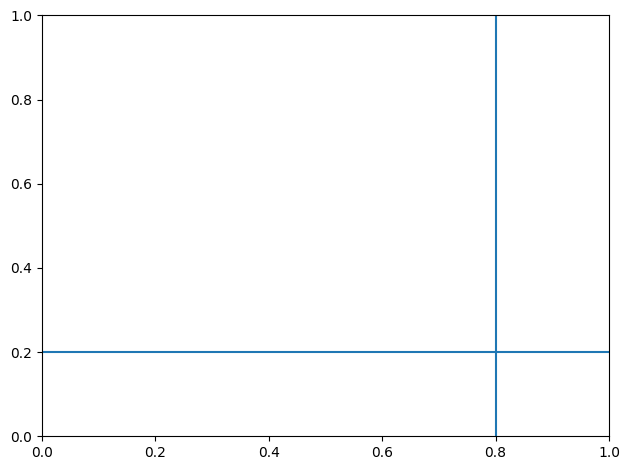

In [14]:
fig, ax = plt.subplots()

ax.axhline(0.2)
ax.axvline(0.8)

ax.set_xlim(0,1)
ax.set_ylim(0,1)

fig.tight_layout()

También podemos cambiar el estilo de la línea. 


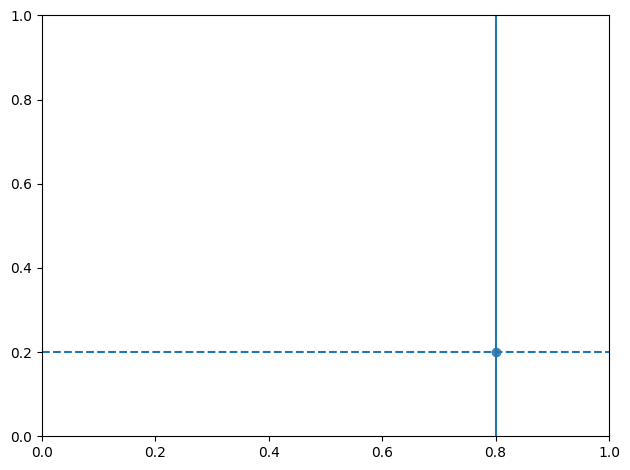

In [15]:
fig, ax = plt.subplots()

ax.axhline(0.2, linestyle='--')
ax.axvline(0.8)

ax.scatter([0.8], [0.2], color='steelblue')

ax.set_xlim(0,1)
ax.set_ylim(0,1)

fig.tight_layout()

O cambiar sus límites.


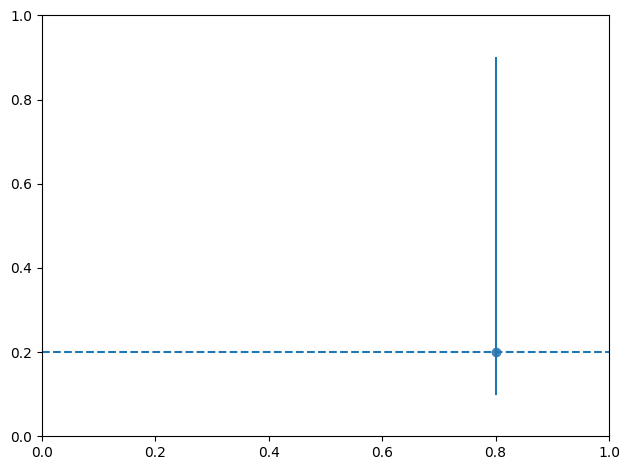

In [16]:
fig, ax = plt.subplots()

ax.axhline(0.2, linestyle='--')
ax.axvline(0.8, 0.1, 0.9)

ax.scatter([0.8], [0.2], color='steelblue')

ax.set_xlim(0,1)
ax.set_ylim(0,1)

fig.tight_layout()

Un caso especial de líneas son las barras de errores, para lo cual está el comando específico `ax.errorbar`

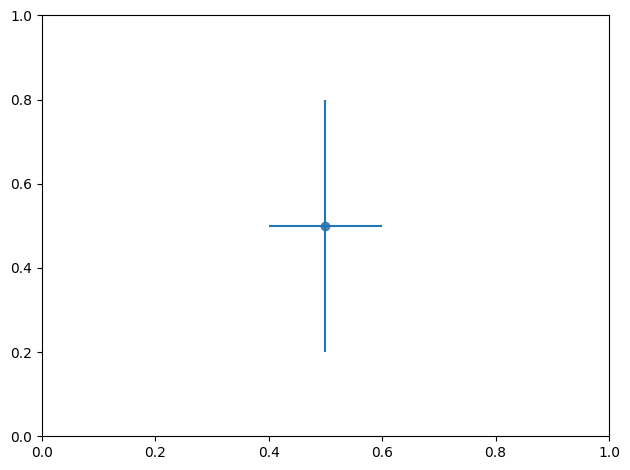

In [17]:
fig, ax = plt.subplots()

ax.scatter([0.5], [0.5], color='steelblue')
ax.errorbar(0.5, 0.5, yerr=0.3, xerr=0.1)

ax.set_xlim(0,1)
ax.set_ylim(0,1)

fig.tight_layout()

## Mejorando graficos

Con los comandos aprendidos, vamos a mejorar algunos gráficos de las clases pasadas. 

### Mapas

Comencemos por el mapa de los resultados del plebiscito en la Región Metropolitana.

In [18]:
import geopandas as gpd

d:\Evolet Group\Repos\.venv\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.4-CAPI-1.17.4) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\carlos\AppData\Local\Temp\ipykernel_28988\3841419929.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io

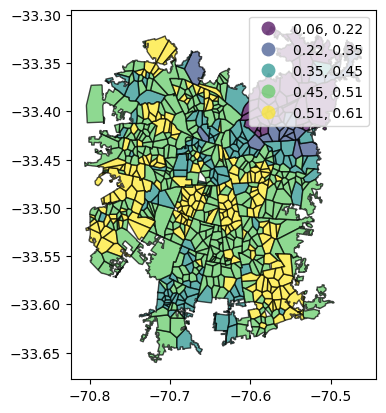

In [19]:
barrios = gpd.read_file('../datos/sf_santiago_plebiscito/voronoi_attributes.shp')

ax = barrios.plot(column = 'apruebo', edgecolor = "black", legend = True, alpha = 0.7, scheme='fisher_jenks')

plt.show()

¿Qué cosas se le puede mejorar a este mapa? Para saber eso debemos primero entender qué es lo que se está graficando. Aquí los números indican el porcentaje de votación que obtuvo la opción “apruebo” en distintas áreas de Santiago. Para verlo mejor, podemos deshacernos del esquema Fisher-Jenks para ver mejor los valores. 


In [20]:
barrios['apruebo'].describe()

count    700.000000
mean       0.463568
std        0.087756
min        0.060670
25%        0.451047
50%        0.482792
75%        0.510087
max        0.605605
Name: apruebo, dtype: float64

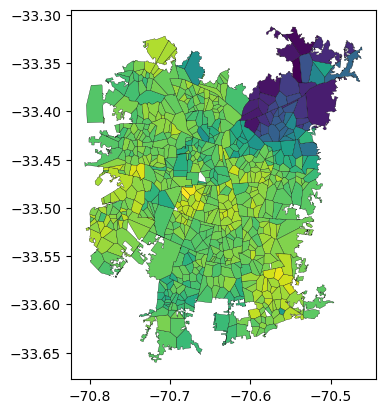

In [21]:
ax = barrios.plot(column = 'apruebo', edgecolor = "black", legend = False, alpha = 1.0, linewidth=0.2)

plt.show()

Lo otro que podemos hacer es elegir un mejor esquema de colores. Ya que sobre 0.5 gana el “apruebo” y bajo 0.5 gana el “rechazo”, entonces calza justo usar una escala de colores divergente para estos valores.

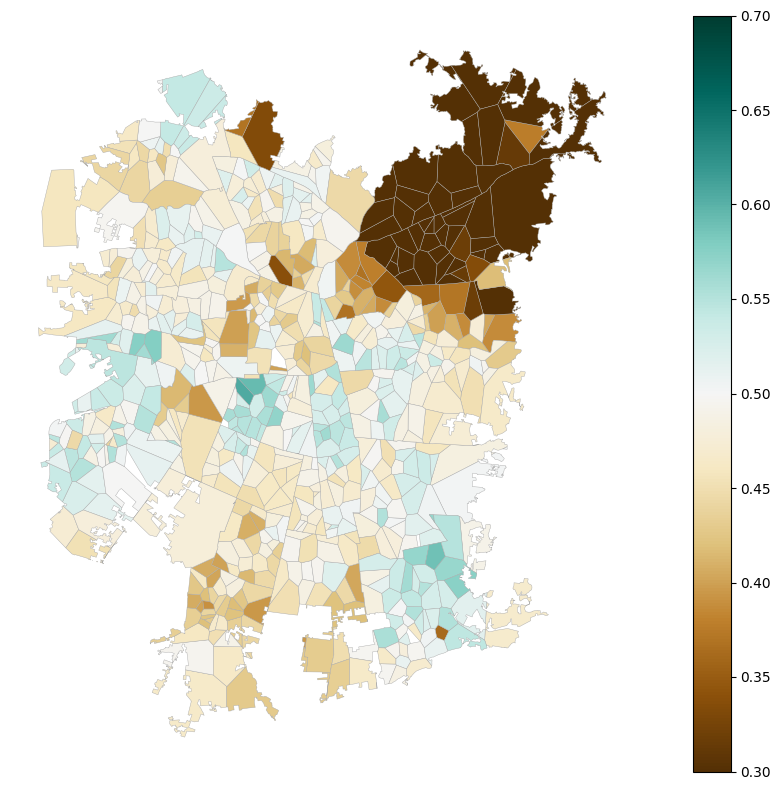

In [22]:
fig, ax = plt.subplots(1,1, figsize=(12,8))

barrios.plot(column='apruebo', edgecolor="darkgray", legend=True, alpha=1.0, ax=ax, linewidth=0.3,
             cmap='BrBG', vmin=0.3, vmax=0.7)

ax.set_axis_off()
plt.tight_layout()
plt.show()

### Colores

Hablando de colores, [esta herramienta](https://get-color.com/image/) los ayudará a poder seleccionar colores desde una imagen dada, lo cual será muy útil para la Tarea #2.


### Treemap

In [23]:
import squarify

In [24]:
df = pd.read_excel('../datos/aportes_gastos_plebiscito.xlsx',
                   sheet_name=['Aportes', 'Propaganda por Medios Digitales', 'Medios'])

aportes = (
    df['Aportes'].groupby(['Nombre Organización', 'Opcion'])
        .agg(aporte=("Monto ($)", "sum"))
        .sort_values(['Opcion', 'aporte'], ascending=False)
        .reset_index()
)

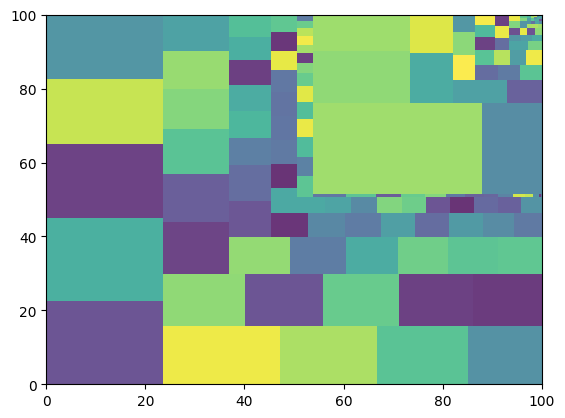

In [25]:
squarify.plot(sizes=aportes['aporte'], alpha=.8 )
plt.show()

En este caso se pueden hacer varias mejoras. Primero, los ejes no se necesitan, ya que solo indican las coordenadas de los rectángulos calculados por squarify, así que no tienen relación con los datos. Segundo, como aquí los datos representan los aportes a las opciones apruebo y rechazo, sería ideal usar distintos colores para cada uno de ellos. Tercero, podemos ocupar distintos tonos de colores para indicar alguna otra variable (en este caso usaremos porcentaje del total de los aportes a aquella opción). Por último, también podemos agregar los nombres de quienes aportaron a cada opción. Ojo, que si se ponen todos los nombres algunos podrían no caber dentro del rectángulo, por ende debemos usar nuestro criterio para decidir cuáles poner.


In [26]:
totA = aportes[aportes['Opcion'] == 'APRUEBO']['aporte'].sum()
totR = aportes[aportes['Opcion'] == 'RECHAZO']['aporte'].sum()
aportes['porcentaje'] = aportes.apply(
    lambda x: x['aporte']/totA if x['Opcion'] == 'APRUEBO' else x['aporte']/totR,
    axis=1
)

In [27]:
pmin = aportes[aportes['Opcion'] == 'APRUEBO']['porcentaje'].min()
pmax = aportes[aportes['Opcion'] == 'APRUEBO']['porcentaje'].max()
normA = mpl.colors.Normalize(vmin=pmin, vmax=pmax)
cmapA = mpl.cm.Blues

pmin = aportes[aportes['Opcion'] == 'RECHAZO']['porcentaje'].min()
pmax = aportes[aportes['Opcion'] == 'RECHAZO']['porcentaje'].max()
normR = mpl.colors.Normalize(vmin=pmin, vmax=pmax)
cmapR = mpl.cm.Reds

aportes['norm'] = aportes.apply(
    lambda x: normA(x['porcentaje']) if x['Opcion'] == 'APRUEBO' else normR(x['porcentaje']),
    axis=1
)
aportes['color'] = aportes.apply(
    lambda x: cmapA(x['norm']) if x['Opcion'] == 'APRUEBO' else cmapR(x['norm']),
    axis=1
)
aportes.head()

,Nombre Organización,Opcion,aporte,porcentaje,norm,color
0,CON MI PLATA NO - AGRUPACIÓN DE AHORRANTES PRE...,RECHAZO,151913777,0.068425,1.000000,"(0.403921568627451, 0.0, 0.05098039215686274, ..."
1,Impulso Norte,RECHAZO,150486500,0.067782,0.990603,"(0.4191772395232603, 0.0036908881199538626, 0...."
2,CHILE INFORMA,RECHAZO,134930001,0.060775,0.888179,"(0.6175009611687813, 0.05167243367935409, 0.07..."
3,AMARILLOS x CHILE,RECHAZO,118582242,0.053412,0.780546,"(0.7598462129950019, 0.0855363321799308, 0.106..."
4,ME IMPORTA CHILE,RECHAZO,118000000,0.053149,0.776712,"(0.7645213379469434, 0.08664359861591696, 0.10..."


Los nombres que se incluirán en el gráfico son aquellos que hayan aportado más del 50% del total que recibió cada opción.

In [28]:
threshold = 0.5
aportes['nombre'] = aportes.apply(
    lambda x: x['Nombre Organización'].split("-")[0] if x['norm'] > threshold else '',
    axis=1
)


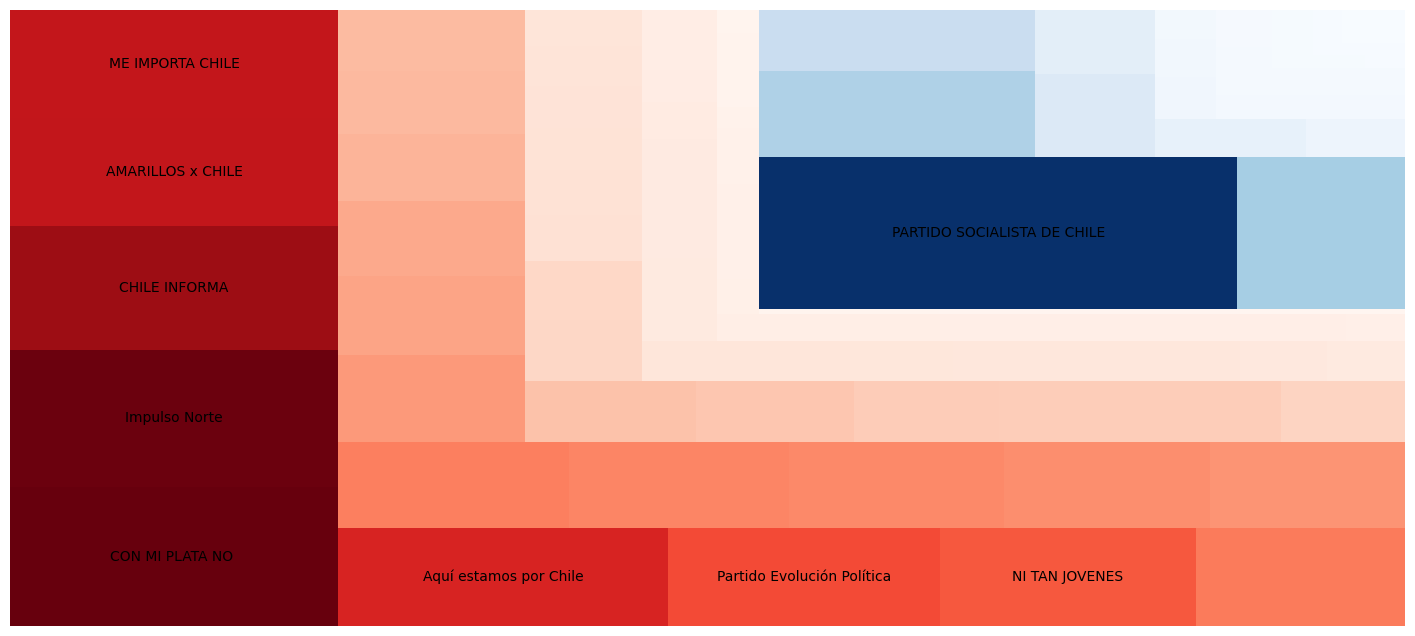

In [29]:
fig, ax = plt.subplots(1,1, figsize=(18,8))

squarify.plot(sizes=aportes['aporte'],
              color=aportes['color'],
              label=aportes['nombre'],
              ax=ax)
plt.axis('off')
plt.show()

Por último podemos mejorar algunos elementos gráficos, como añadir separación entre cada rectángulo y cambiarle el color a los labels para que se distingan mejor.


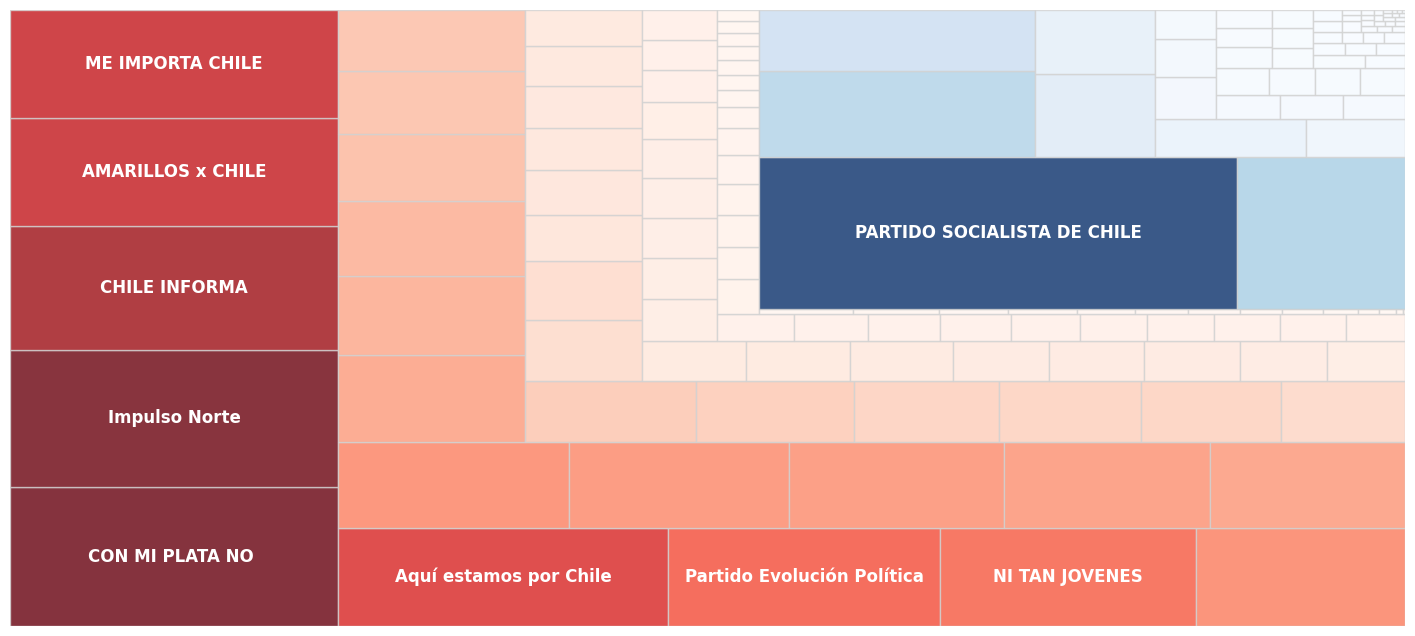

In [30]:
fig, ax = plt.subplots(1,1, figsize=(18,8))

squarify.plot(sizes=aportes['aporte'],
              color=aportes['color'],
              label=aportes['nombre'],
              alpha=.8,
              text_kwargs={
                  'fontsize':12,
                  'color': 'white',
                  'weight': 'bold'
              },
              ax=ax,
              edgecolor='#d2d2d2')
plt.axis('off')
plt.show()

## Gráfico de burbujas

In [31]:
df_scatter = pd.read_csv("../datos/rosling.csv")
df_scatter.head()

,Country,GDP per capita,Life expectancy,Population,Continent
0,Lesotho,2598,47.1,2174645,Africa
1,Central African Republic,599,49.6,4546100,Africa
2,Swaziland,6095,51.8,1319011,Africa
3,Afghanistan,1925,53.8,33736494,Asia
4,Somalia,624,54.2,13908129,Africa


In [32]:
xlabel = 'GDP per capita'
ylabel = 'Life expectancy'
size = 'Population'

max_population = df_scatter[size].max()
df_scatter['size'] = 3000 * df_scatter[size] / max_population

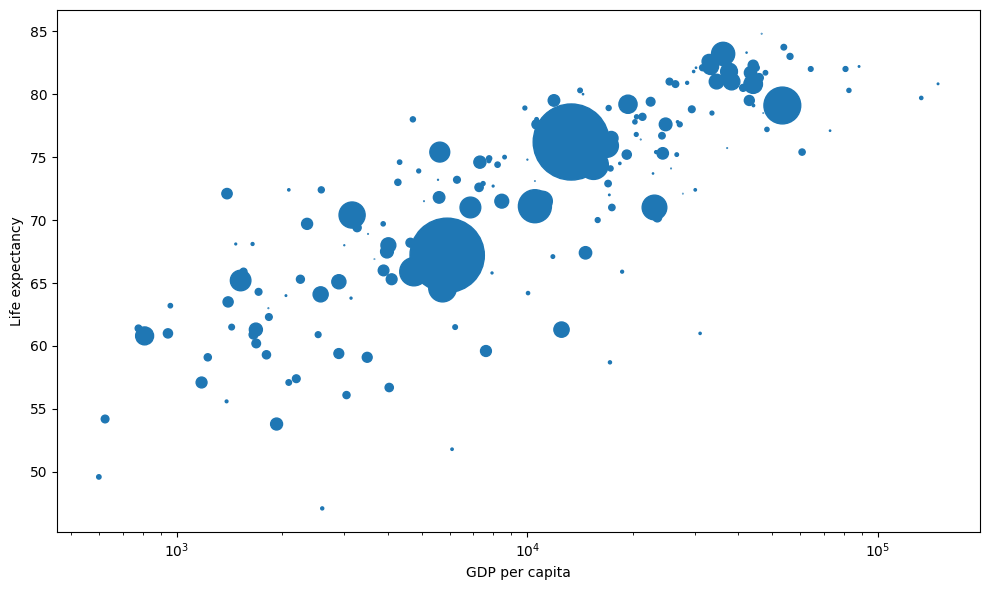

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(df_scatter[xlabel], df_scatter[ylabel], s=df_scatter['size'])
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_xscale('log')

fig.tight_layout()

Comencemos agregando color a cada burbuja, para lo cual usaremos el continente. Además borramos los ejes que no agregan información.

In [34]:
df_scatter['Continent'].unique()

array(['Africa', 'Asia', 'Australia', 'North America', 'South America',
       'Europe'], dtype=object)

In [35]:
colors = {
    'Africa': "#e41a1c",
    'Asia': "#377eb8",
    'Australia': "#4daf4a",
    'Europe':"#984ea3",
    'North America': "#ff7f00",
    'South America': "#a65628"
}

df_scatter['color'] = df_scatter['Continent'].map(colors)

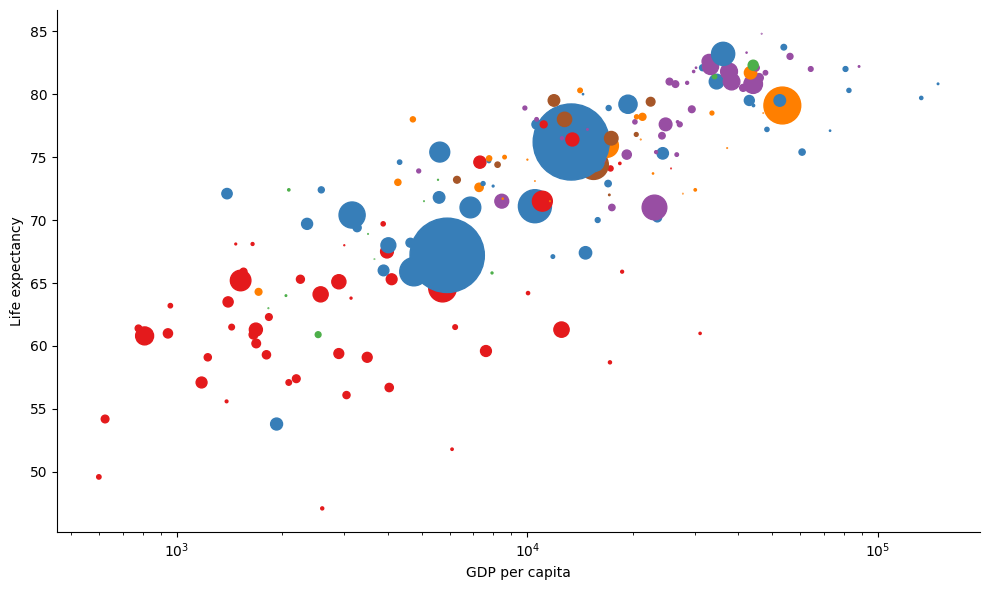

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(df_scatter[xlabel], df_scatter[ylabel],
           s=df_scatter['size'],
           c=df_scatter['color'])
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_xscale('log')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.tight_layout()

Vemos que algunas burbujas de un color se mezclan con otras burbujas del mismo color. Para añadir separación podemos usar un borde de color blanco.

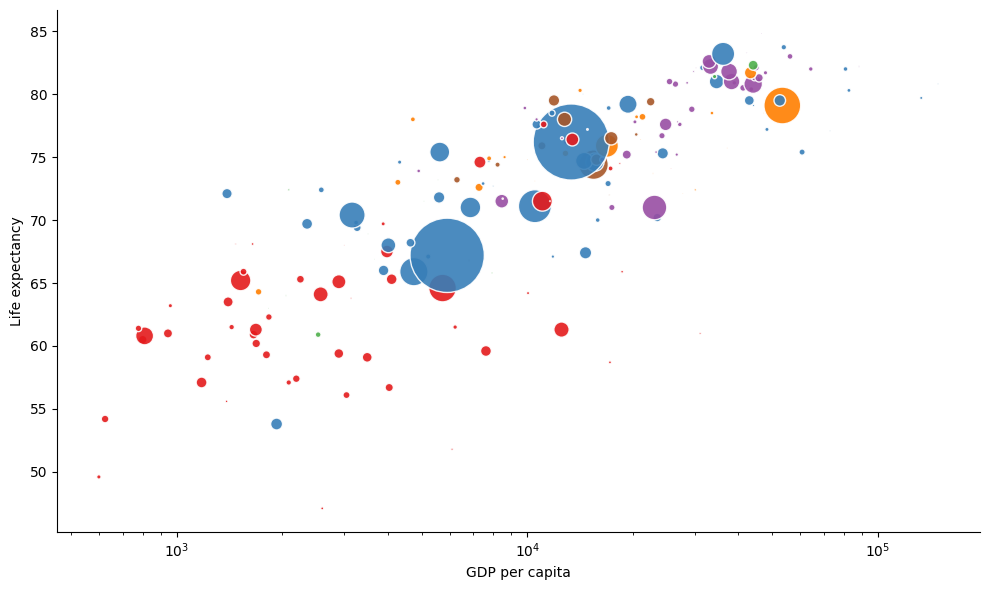

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(df_scatter[xlabel], df_scatter[ylabel],
           s=df_scatter['size'],
           c=df_scatter['color'],
           alpha=0.9,
           edgecolors='white')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_xscale('log')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.tight_layout()

Además podemos agregar una leyenda personalizada basada en los colores que elegimos para cada continente.


In [38]:
from matplotlib.lines import Line2D

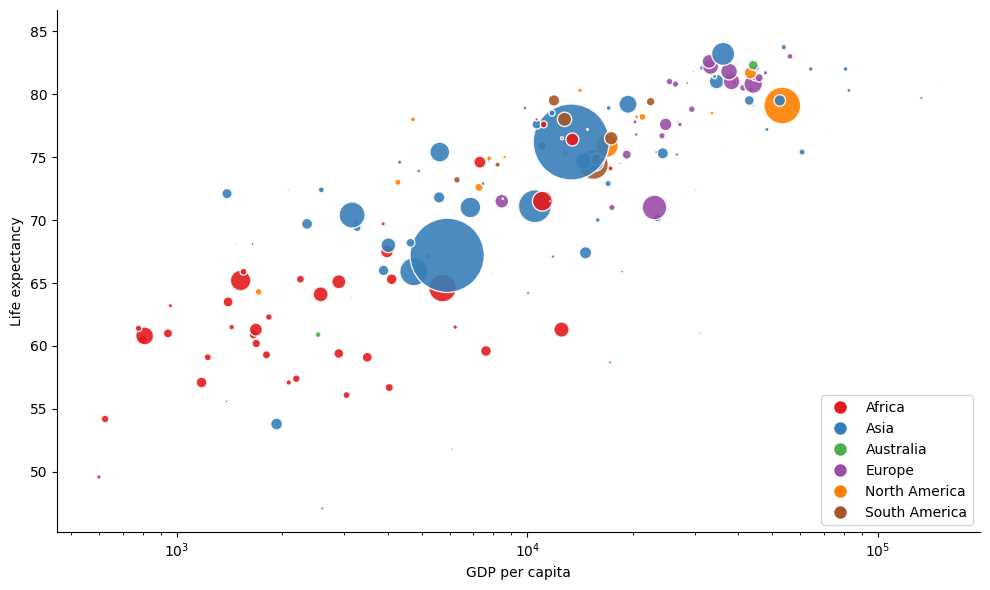

In [39]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(df_scatter[xlabel], df_scatter[ylabel],
           s=df_scatter['size'],
           c=df_scatter['color'],
           alpha=0.9,
           edgecolors='white')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_xscale('log')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

legend_elements = [ Line2D([0], [0], marker='o', color='w', label=x, markerfacecolor=colors[x], markersize=10)
                      for x in colors.keys()]
ax.legend(handles=legend_elements, loc='lower right')

fig.tight_layout()

El problema que aún tiene este gráfico es que algunas burbujas pequeñas son tapadas por burbujas más grandes. Una forma de resolver esto es graficando las burbujas más grandes primero, y luego las más pequeñas. Para eso tenemos que ordenar los datos.


In [40]:
df_sort = df_scatter.sort_values(by=size, ascending=False)

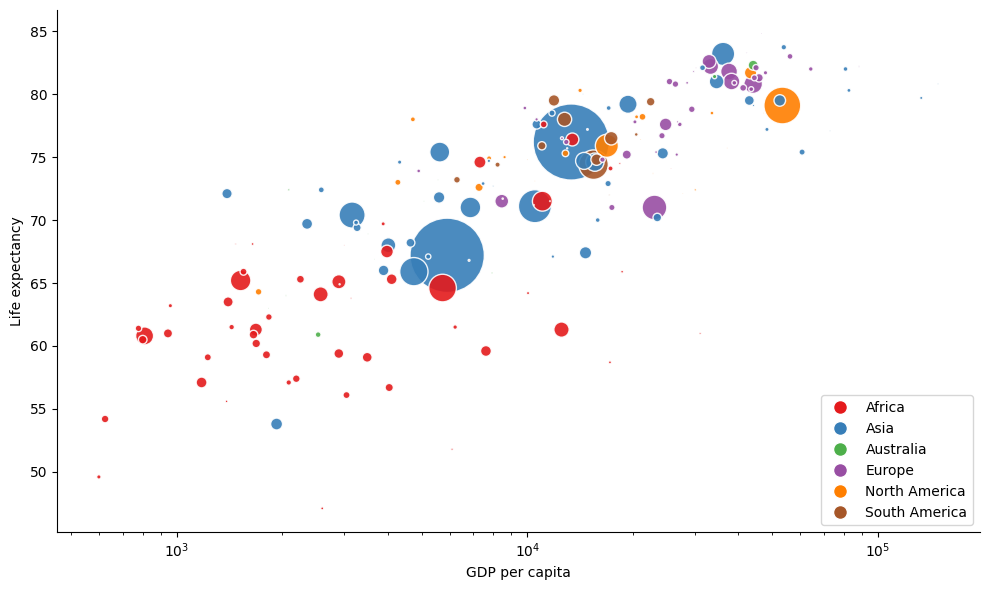

In [41]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(df_sort[xlabel], df_sort[ylabel],
           s=df_sort['size'],
           c=df_sort['color'],
           alpha=0.9,
           edgecolors='white')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_xscale('log')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

legend_elements = [Line2D([0], [0], marker='o', color='w', label=x, markerfacecolor=colors[x], markersize=10)
                      for x in colors.keys()]
ax.legend(handles=legend_elements, loc='lower right')

fig.tight_layout()


Por último, si queremos enfocarnos en algún punto particular, podemos agregar anotaciones para concentrar la atención en aquel punto. Para eso primero tenemos que explorar el dato a resaltar.

In [42]:
df_chile = df_sort[df_sort['Country'] == 'Chile']

<Axes: xlabel='GDP per capita', ylabel='Life expectancy'>

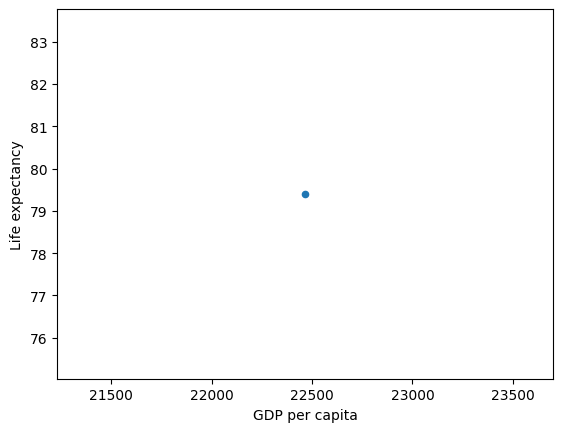

In [43]:
df_chile.plot.scatter(x=xlabel, y=ylabel)

Una vez que sabemos donde se ubica el punto, podemos elegir el lugar donde pondremos el texto y la línea para resaltarlo.

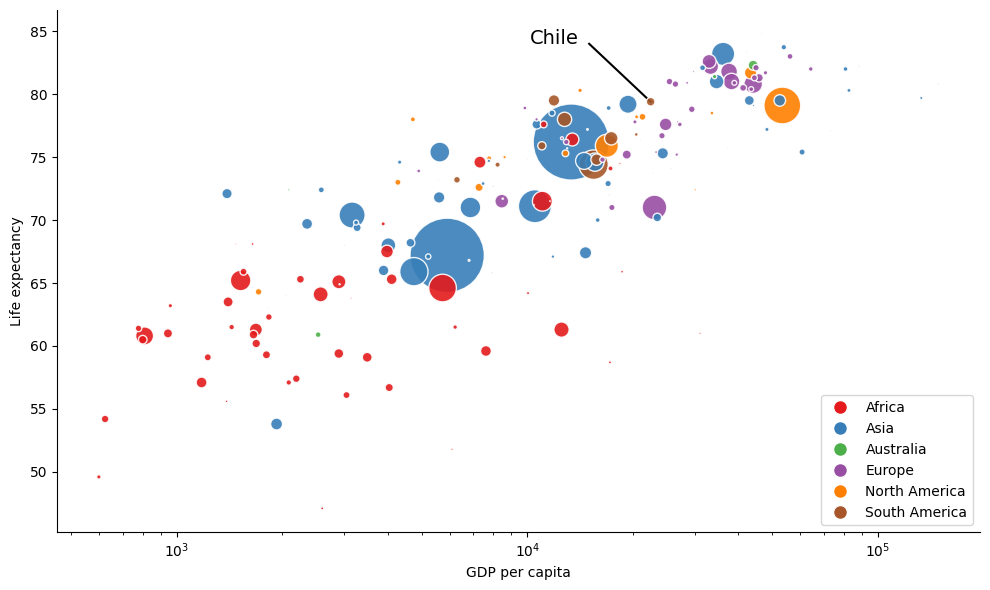

In [51]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot([df_chile[xlabel].iloc[0], 15000], [df_chile[ylabel].iloc[0], 84], c='k', zorder=0.5)
ax.text(14000, 84, 'Chile', ha='right', fontsize=14)

ax.scatter(df_sort[xlabel], df_sort[ylabel],
           s=df_sort['size'],
           c=df_sort['color'],
           alpha=0.9,
           edgecolors='white')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_xscale('log')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

legend_elements = [Line2D([0], [0], marker='o', color='w', label=x, markerfacecolor=colors[x], markersize=10)
                      for x in colors.keys()]
ax.legend(handles=legend_elements, loc='lower right')
#ax.set_facecolor("#E0E0E0")

fig.tight_layout()
